In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

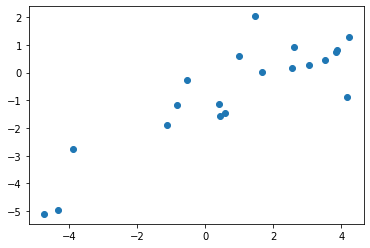

In [2]:
# Generate 20 data points
N = 20

# Random data on the x-axis in (-5, +5)
X = np.random.random(N)*10-5

# Create a line plus some gaussian noise
# Ideal function for model to find is Y = 0.5x-1
Y = 0.5 * X - 1 + np.random.randn(N)

# Now plot it
plt.scatter(X, Y)

In [3]:
# Create a linear regression model with 1 input and 1 output
model = nn.Linear(1, 1)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# PyTorch requires Nx1 matrices
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# PyTorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [4]:
type(inputs)

torch.Tensor

In [5]:
# Train the model
n_epochs = 30
losses = []
for i in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass to get model predictions
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # Keep the loss so we can plot it later
  losses.append(loss.item())

  # Backward and optimise
  loss.backward()
  optimizer.step()

  print(f'Epoch {i+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/30, Loss: 10.3595
Epoch 2/30, Loss: 5.2452
Epoch 3/30, Loss: 2.9164
Epoch 4/30, Loss: 1.8514
Epoch 5/30, Loss: 1.3613
Epoch 6/30, Loss: 1.1339
Epoch 7/30, Loss: 1.0269
Epoch 8/30, Loss: 0.9758
Epoch 9/30, Loss: 0.9508
Epoch 10/30, Loss: 0.9382
Epoch 11/30, Loss: 0.9316
Epoch 12/30, Loss: 0.9281
Epoch 13/30, Loss: 0.9261
Epoch 14/30, Loss: 0.9249
Epoch 15/30, Loss: 0.9242
Epoch 16/30, Loss: 0.9237
Epoch 17/30, Loss: 0.9234
Epoch 18/30, Loss: 0.9233
Epoch 19/30, Loss: 0.9231
Epoch 20/30, Loss: 0.9231
Epoch 21/30, Loss: 0.9230
Epoch 22/30, Loss: 0.9230
Epoch 23/30, Loss: 0.9229
Epoch 24/30, Loss: 0.9229
Epoch 25/30, Loss: 0.9229
Epoch 26/30, Loss: 0.9229
Epoch 27/30, Loss: 0.9229
Epoch 28/30, Loss: 0.9229
Epoch 29/30, Loss: 0.9229
Epoch 30/30, Loss: 0.9229


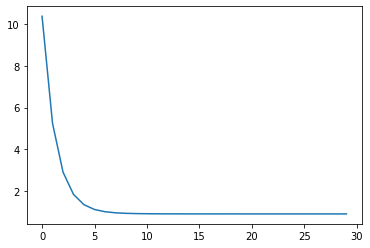

In [6]:
plt.plot(losses)

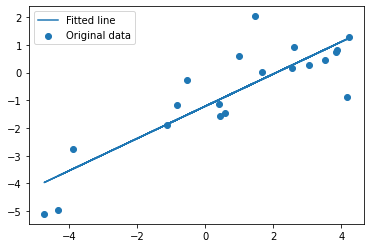

In [7]:
# Plot the graph with prediction
# In order to work with numpy arrays, detach the tensor and then call numpy
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [8]:
# Another method
with torch.no_grad():
  out = model(inputs).numpy()
out

array([[-3.4723785 ],
       [ 1.2359984 ],
       [ 0.26936293],
       [-0.63532287],
       [-0.96368134],
       [ 0.8324976 ],
       [-1.696041  ],
       [ 0.30193114],
       [ 1.2153592 ],
       [-1.8669504 ],
       [-0.36578268],
       [-0.97720194],
       [ 1.0395935 ],
       [ 1.0194573 ],
       [ 0.55914235],
       [-3.9702184 ],
       [-0.24544251],
       [-0.88255596],
       [-3.7376206 ],
       [-1.533513  ]], dtype=float32)

In [9]:
# Check the efficacy of the model using synthetic data
# This is useful as we know the answer
# True values of (w, b) are (0.5, -1)
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.5814552]] [-1.2113733]
